# Modelo de Romer
### Para crecimiento endogeno

Plantee el sistema de ecuaciones diferenciales ordinarias de primer orden

𝑥1′ (𝑡) = 𝑓1(𝑡, 𝑥1(𝑡), … 𝑥𝑚(𝑡))
⋮
𝑥𝑚′ (𝑡) = 𝑓𝑚(𝑡, 𝑥1(𝑡), … 𝑥𝑚(𝑡))

Mencionando de manera expresa cuántas y cuáles son las incógnitas, y definiendo las
funciones de tasa de cambio 𝑓𝑙(𝑡, 𝑥1(𝑡), … 𝑥𝑚(𝑡)), para 𝑙 = 1,2, … , 𝑚.

Sistema de ecuaciones:

K(t): Nivel de capital físico en el tiempo tt.
A(t)A(t): Nivel de tecnología o conocimiento en el tiempo tt.
Y(t)Y(t): Producción en el tiempo tt.

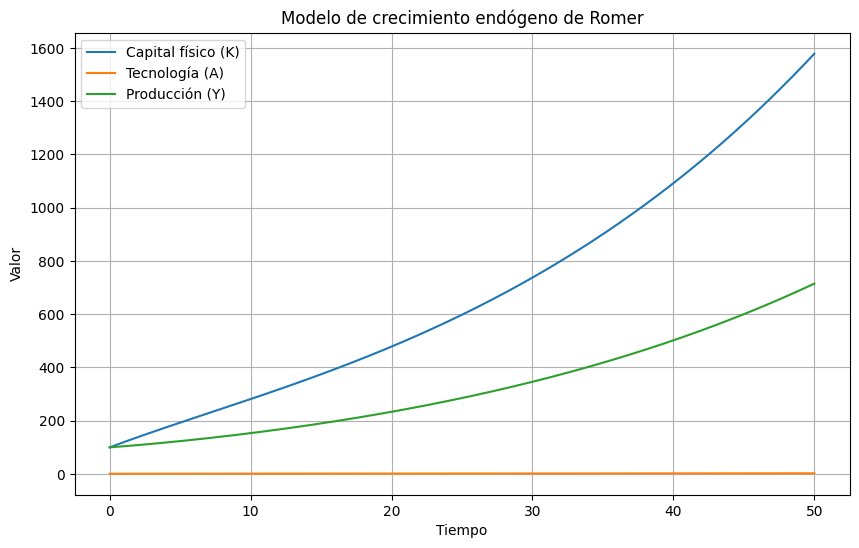

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


s = 0.3  
delta = 0.1  
g = 0.02  
alpha = 0.3  


def romer_model(x, t):
    K, A, Y = x  
    dKdt = s * Y - delta * K
    dAdt = g * A
    dYdt = A * K**alpha
    return [dKdt, dAdt, dYdt]


K0 = 100.0  
A0 = 1.0    
Y0 = 100.0  
x0 = [K0, A0, Y0]  


t = np.linspace(0, 50, 1000) 


sol = odeint(romer_model, x0, t)


K_sol = sol[:, 0]
A_sol = sol[:, 1]
Y_sol = sol[:, 2]


plt.figure(figsize=(10, 6))
plt.plot(t, K_sol, label='Capital físico (K)')
plt.plot(t, A_sol, label='Tecnología (A)')
plt.plot(t, Y_sol, label='Producción (Y)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Modelo de crecimiento endógeno de Romer')
plt.legend()
plt.grid(True)
plt.show()


Determine (consultándolo en la literatura o proponiéndolo de manera argumentada) los
valores de los parámetros constantes en su sistema de ecuaciones. Elija dos
escenarios distintos de condiciones iniciales, dando su interpretación. Elija un tiempo
inicial y un tiempo final suficientemente largo para que en él se desarrolle o se observe
adecuadamente el comportamiento de la solución.

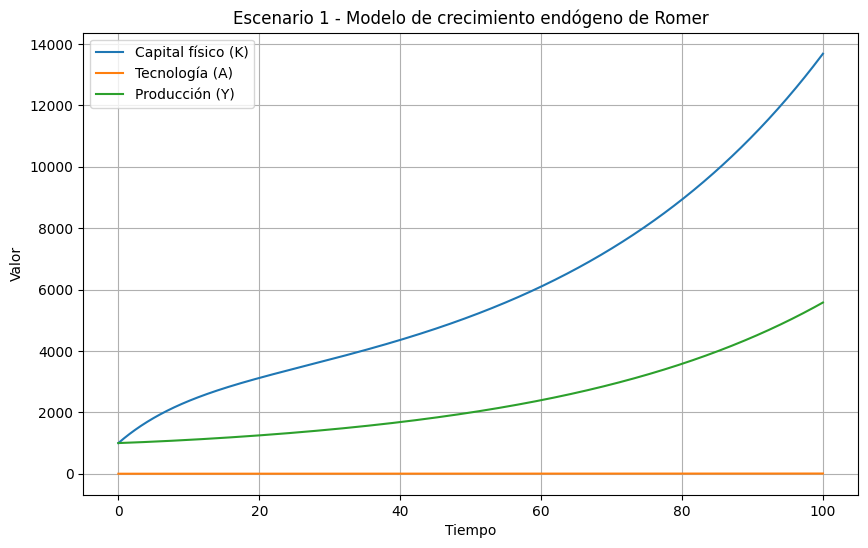

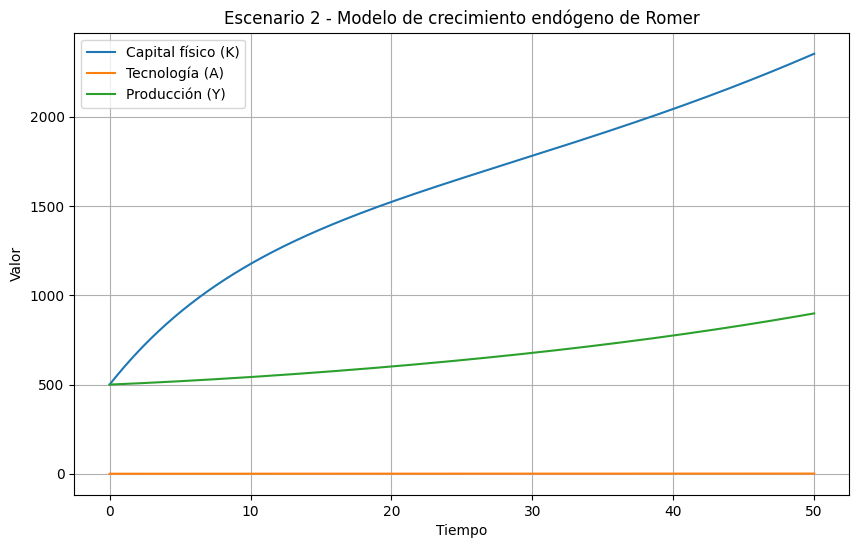

In [2]:

K01, A01, Y01 = 1000, 1, 1000
x0_1 = [K01, A01, Y01]
t1 = np.linspace(0, 100, 1000)  


sol1 = odeint(romer_model, x0_1, t1)


K02, A02, Y02 = 500, 0.5, 500
x0_2 = [K02, A02, Y02]
t2 = np.linspace(0, 50, 1000)  


sol2 = odeint(romer_model, x0_2, t2)


plt.figure(figsize=(10, 6))
plt.plot(t1, sol1[:, 0], label='Capital físico (K)')
plt.plot(t1, sol1[:, 1], label='Tecnología (A)')
plt.plot(t1, sol1[:, 2], label='Producción (Y)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Escenario 1 - Modelo de crecimiento endógeno de Romer')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t2, sol2[:, 0], label='Capital físico (K)')
plt.plot(t2, sol2[:, 1], label='Tecnología (A)')
plt.plot(t2, sol2[:, 2], label='Producción (Y)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Escenario 2 - Modelo de crecimiento endógeno de Romer')
plt.legend()
plt.grid(True)
plt.show()


Use los siguientes métodos para obtener una solución en cada caso
(a) Euler
(b) Punto medio explícito
(c) Euler implícito
(d) Trapecio implícito

Para cada uno de los métodos, use 5 valores de paso de tiempo ℎ, cada uno siendo la
mitad del anterior. Usando el resultado con el ℎ más pequeño, para cada método y
cada escenario haga una gráfica en la que se vean las soluciones aproximadas de
𝑥1(𝑡), … 𝑥𝑚(𝑡) vs 𝑡

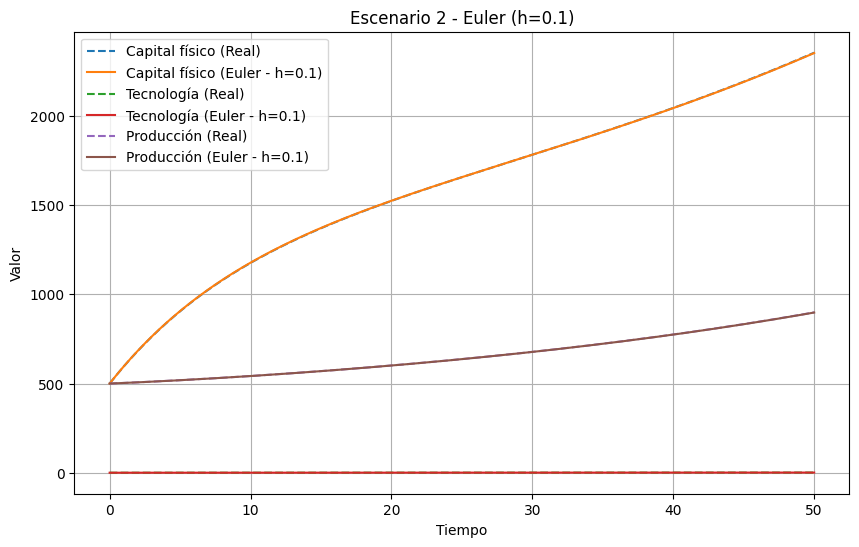

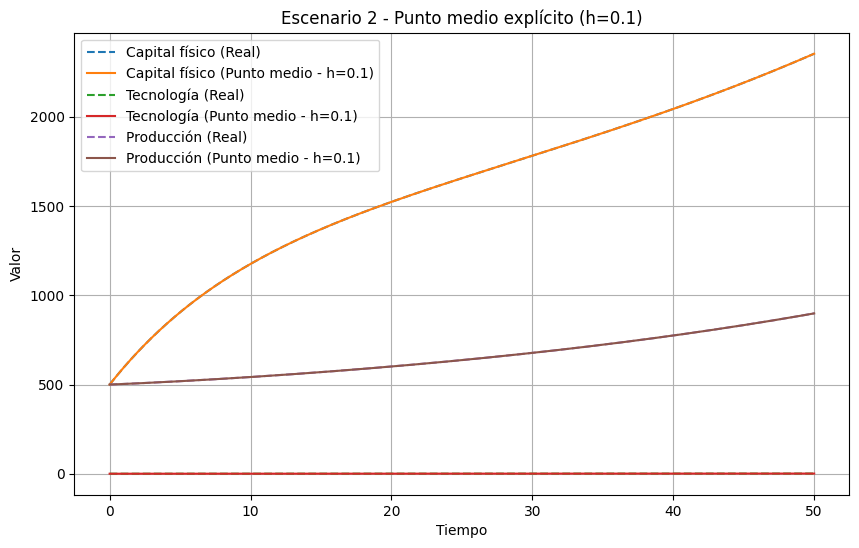

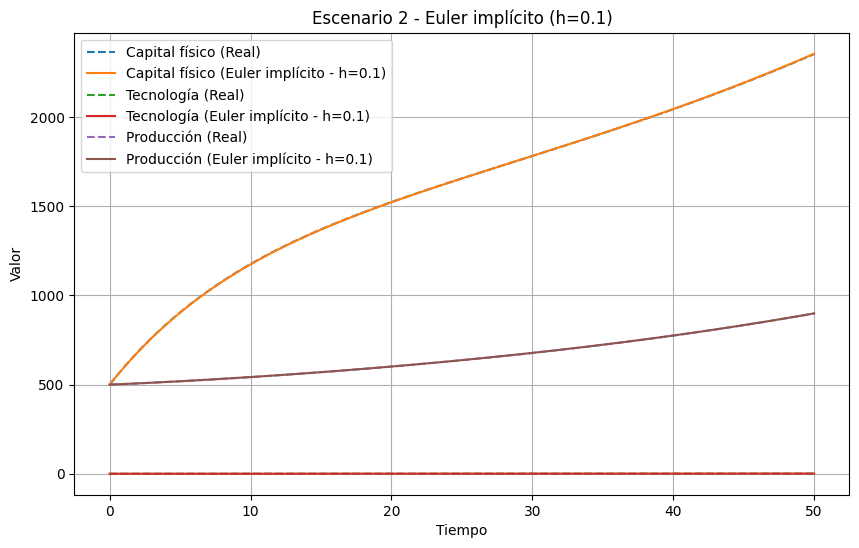

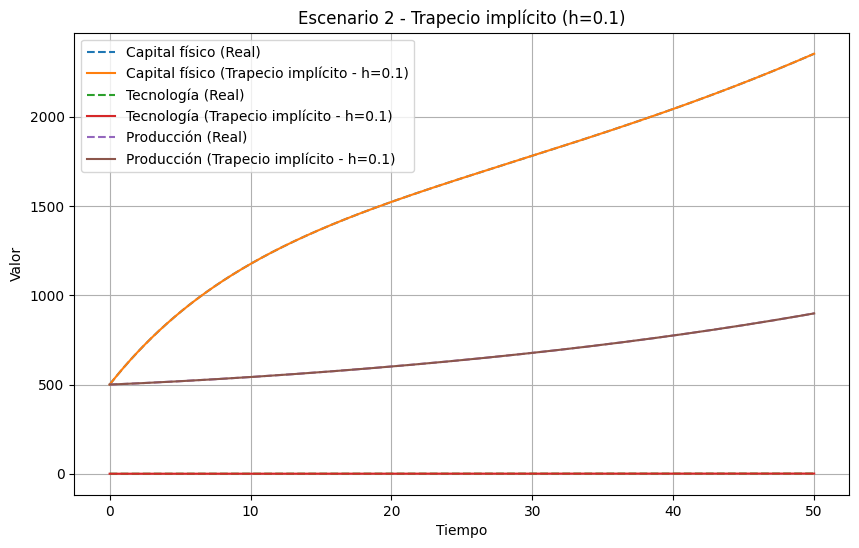

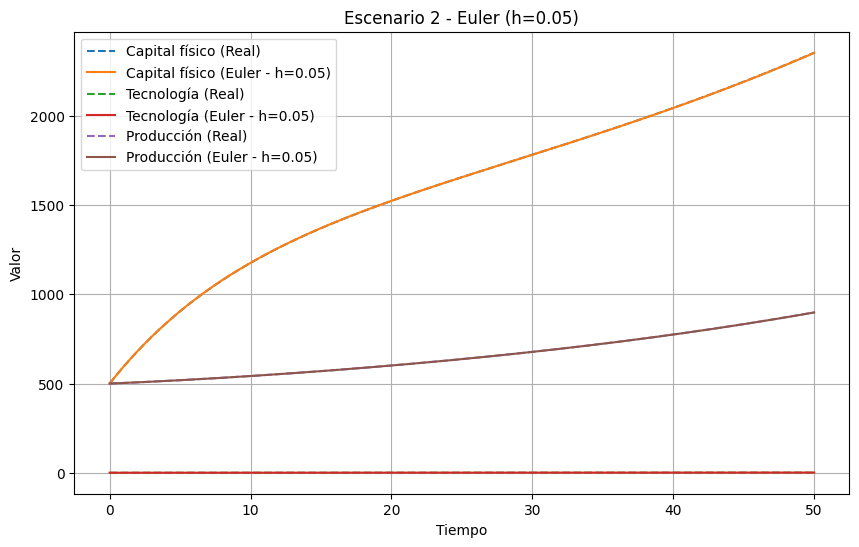

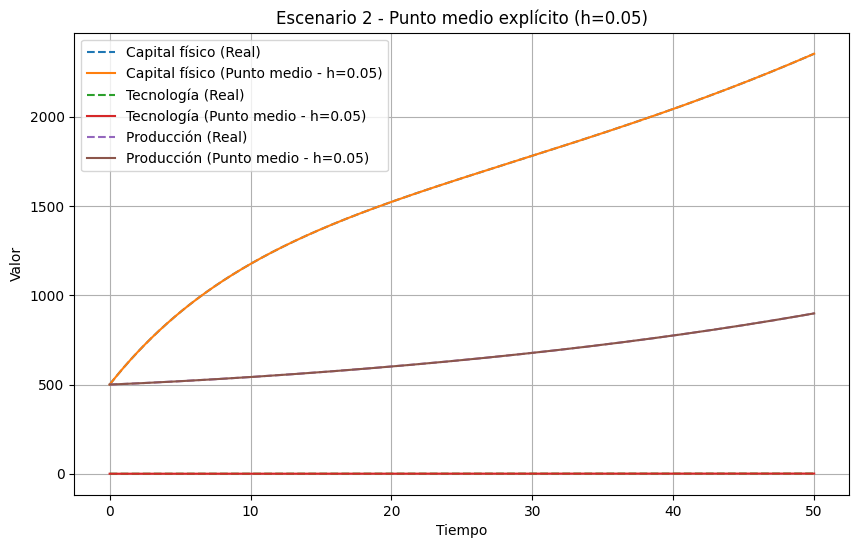

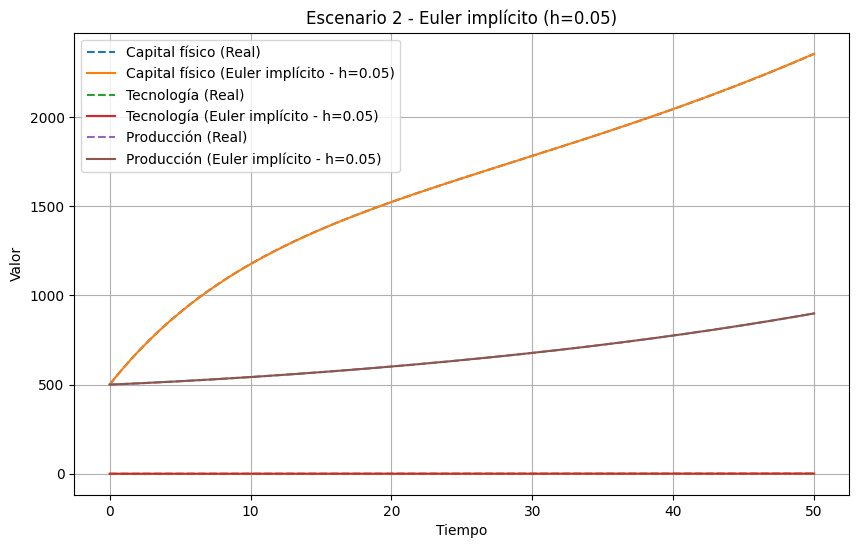

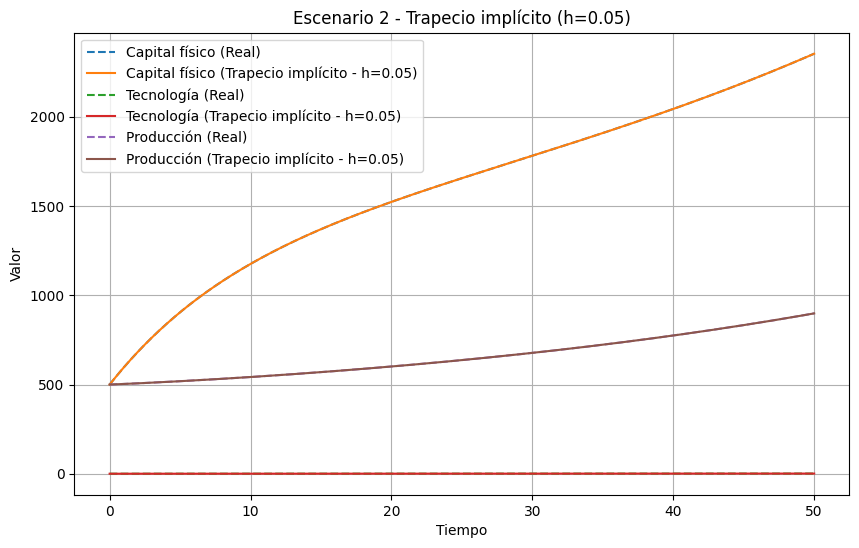

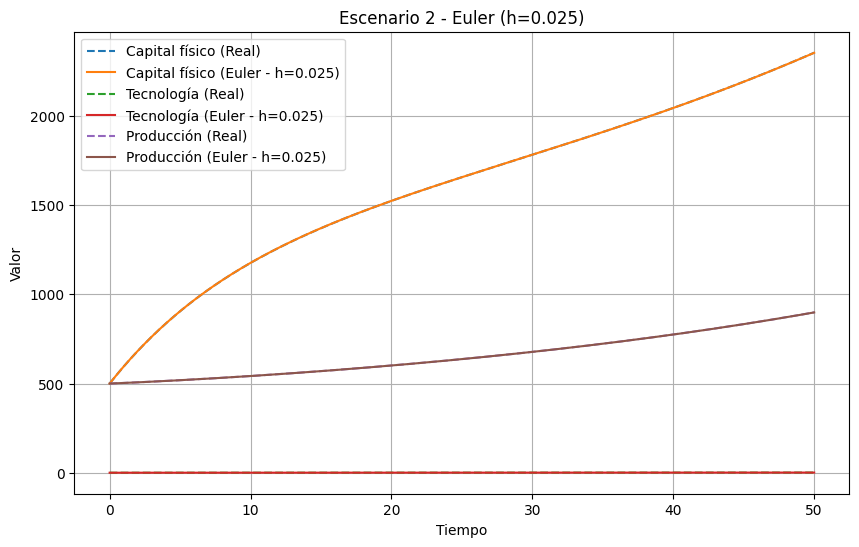

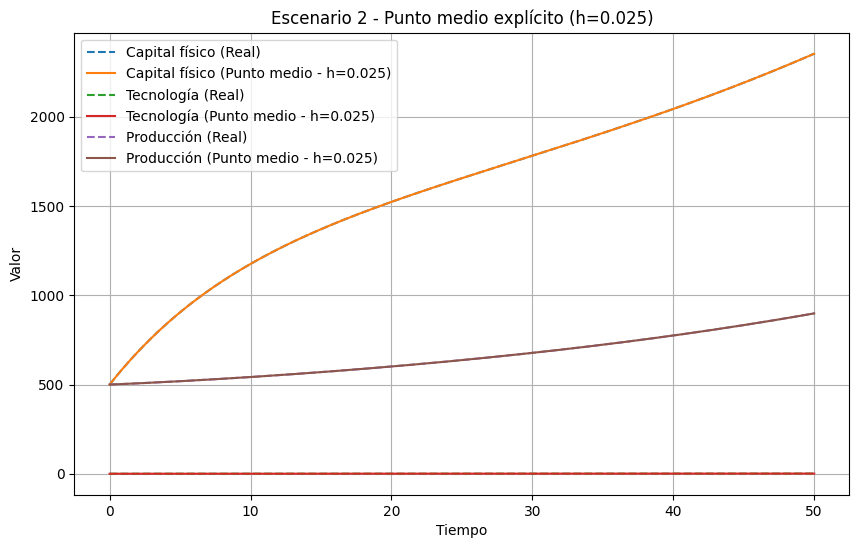

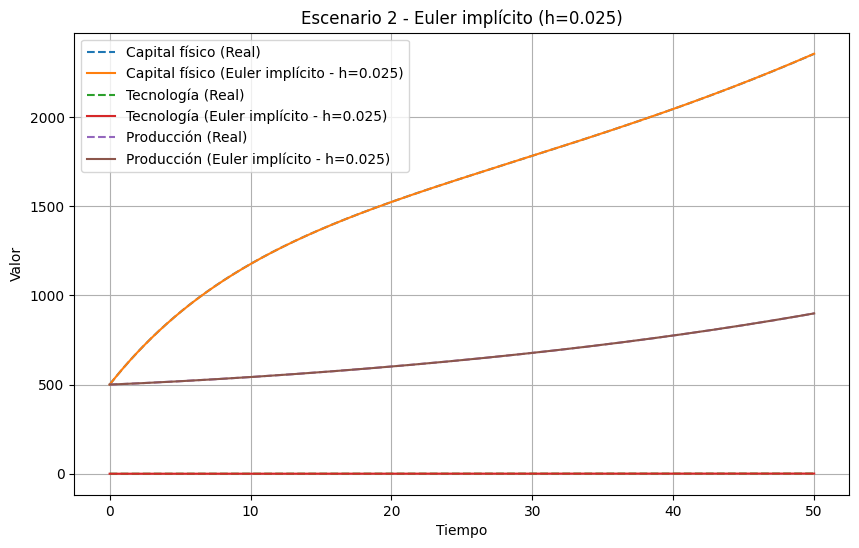

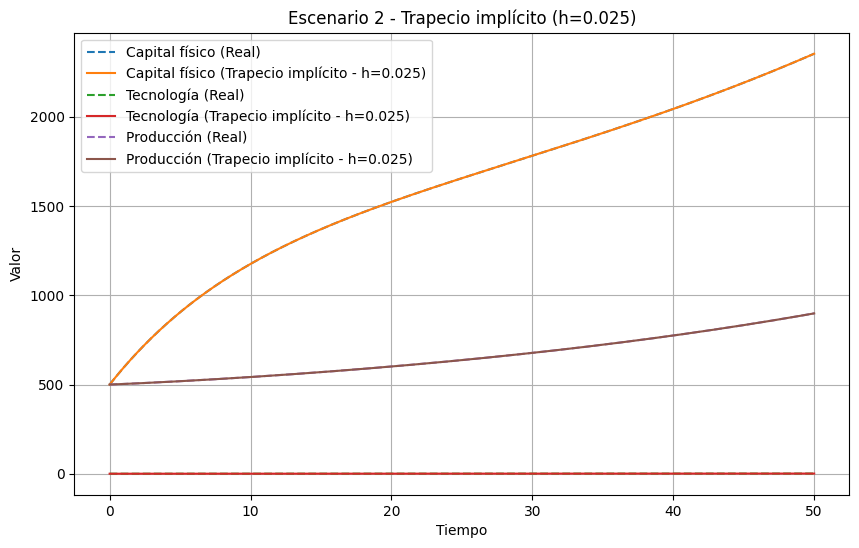

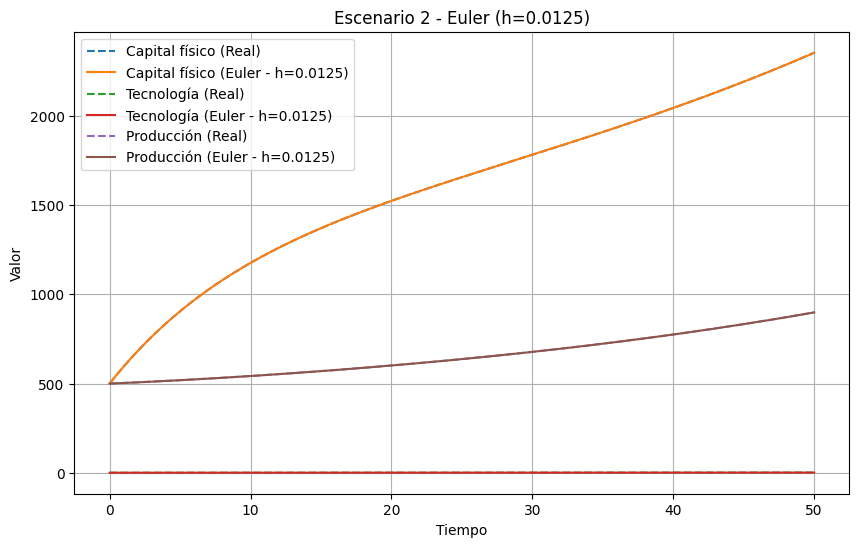

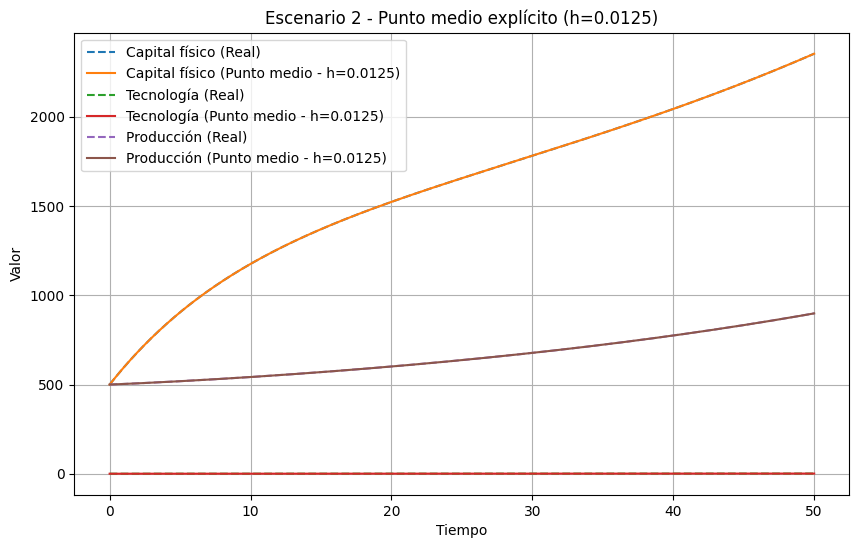

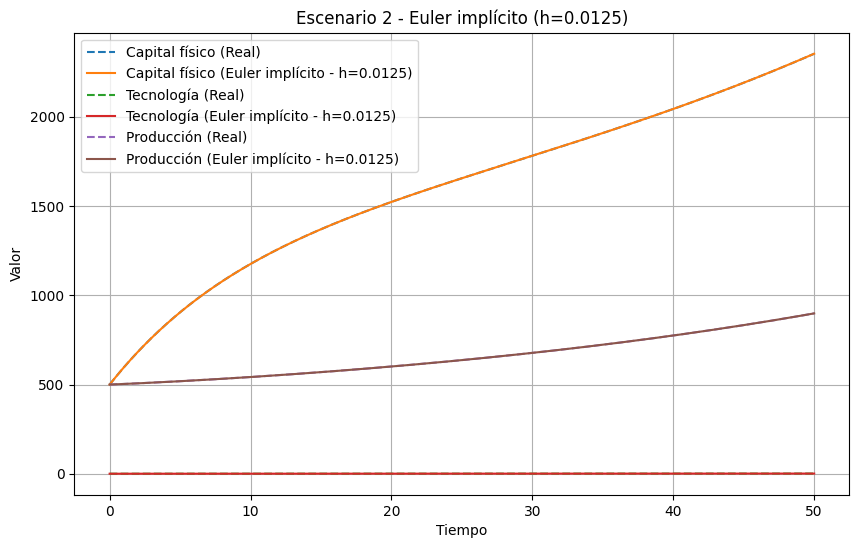

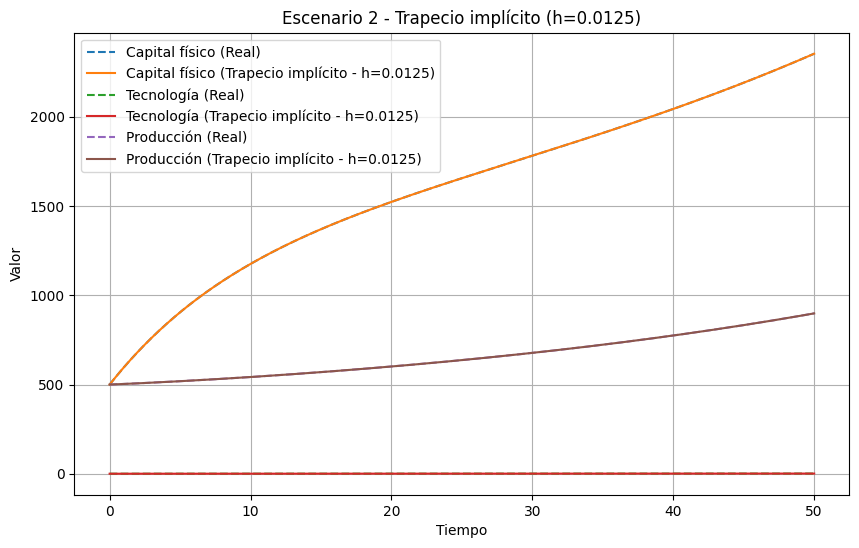

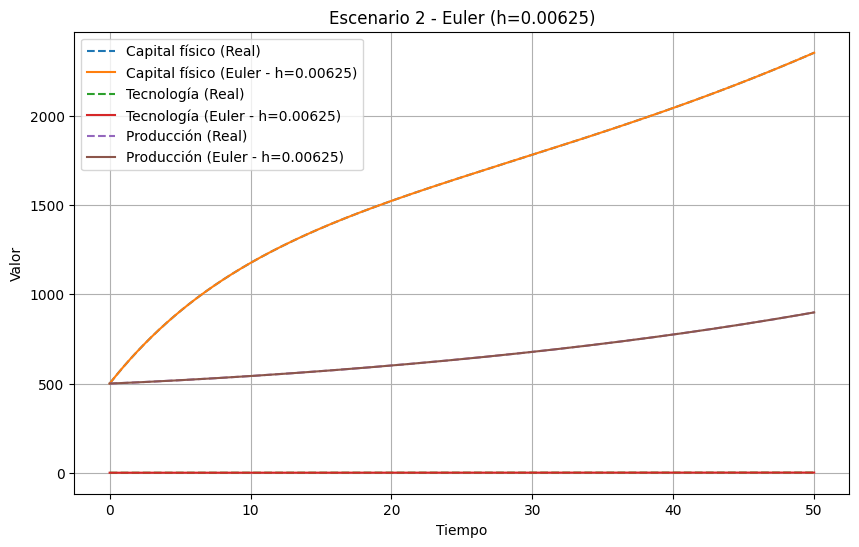

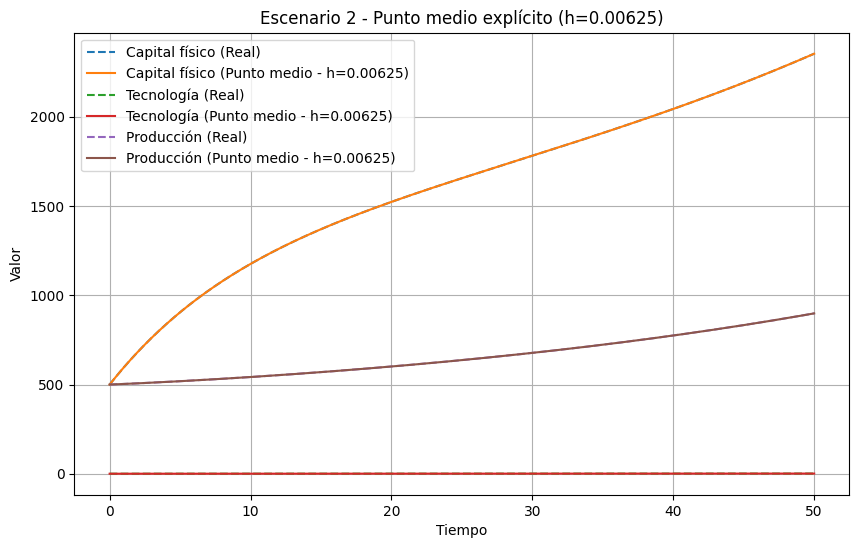

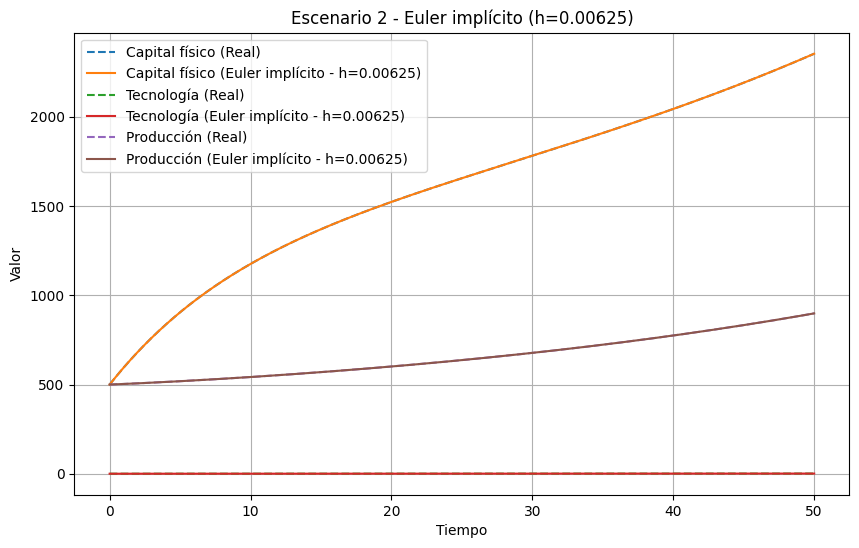

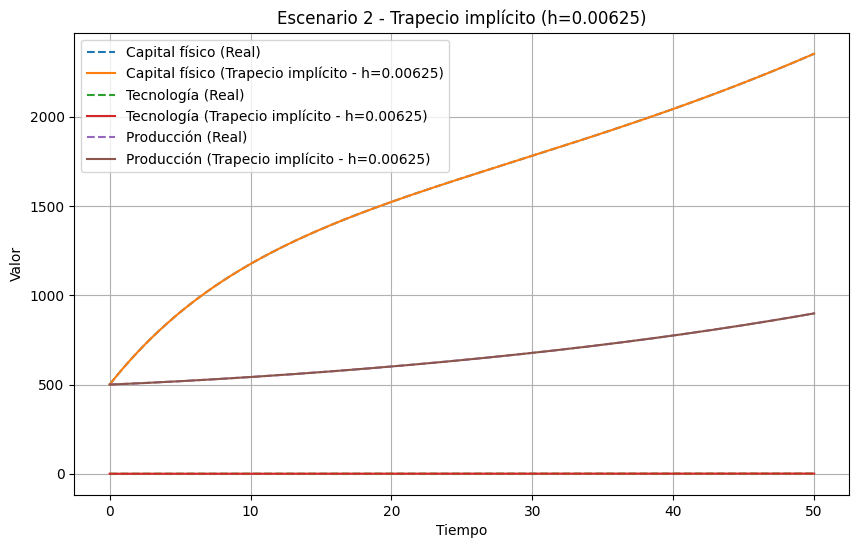

In [3]:

# Método de Euler
def euler(f, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(1, n):
        dt = t[i] - t[i-1]
        x[i] = x[i-1] + dt * np.array(f(x[i-1], t[i-1]))
    return x

# Método de punto medio explícito
def punto_medio(f, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(1, n):
        dt = t[i] - t[i-1]
        k1 = np.array(f(x[i-1], t[i-1]))
        k2 = np.array(f(x[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt))
        x[i] = x[i-1] + dt * k2
    return x

# Método de Euler implícito (método de Newton-Raphson para resolver la ecuación implícita)
def euler_implicito(f, x0, t, tol=1e-6, max_iter=100):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(1, n):
        dt = t[i] - t[i-1]
        x_guess = x[i-1] + dt * np.array(f(x[i-1], t[i-1]))
        for j in range(max_iter):
            x_new = x[i-1] + dt * np.array(f(x_guess, t[i]))
            if np.linalg.norm(x_new - x_guess) < tol:
                x[i] = x_new
                break
            x_guess = x_new
    return x

# Método de trapecio implícito
def trapecio_implicito(f, x0, t, tol=1e-6, max_iter=100):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(1, n):
        dt = t[i] - t[i-1]
        x_guess = x[i-1] + dt * np.array(f(x[i-1], t[i-1]))
        for j in range(max_iter):
            x_new = x[i-1] + 0.5 * dt * (np.array(f(x[i-1], t[i-1])) + np.array(f(x_guess, t[i])))
            if np.linalg.norm(x_new - x_guess) < tol:
                x[i] = x_new
                break
            x_guess = x_new
    return x

# Escenario 2:
K02, A02, Y02 = 500, 0.5, 500
x0_2 = [K02, A02, Y02]
t2 = np.linspace(0, 50, 1000)  # 50 años

# Valores de h
h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]

# Función real 
t_real = np.linspace(0, 50, 1000)  
sol_real = odeint(romer_model, x0_2, t_real)


for h in h_values:
    t_euler = np.arange(0, t2[-1] + h, h)
    t_punto_medio = np.arange(0, t2[-1] + h, h)
    t_euler_implicito = np.arange(0, t2[-1] + h, h)
    t_trapecio_implicito = np.arange(0, t2[-1] + h, h)

    sol_euler = euler(romer_model, x0_2, t_euler)
    sol_punto_medio = punto_medio(romer_model, x0_2, t_punto_medio)
    sol_euler_implicito = euler_implicito(romer_model, x0_2, t_euler_implicito)
    sol_trapecio_implicito = trapecio_implicito(romer_model, x0_2, t_trapecio_implicito)

    # escenario 2 (Euler)
    plt.figure(figsize=(10, 6))
    plt.plot(t_real, sol_real[:, 0], label='Capital físico (Real)', linestyle='--')
    plt.plot(t_euler, sol_euler[:, 0], label=f'Capital físico (Euler - h={h})')
    plt.plot(t_real, sol_real[:, 1], label='Tecnología (Real)', linestyle='--')
    plt.plot(t_euler, sol_euler[:, 1], label=f'Tecnología (Euler - h={h})')
    plt.plot(t_real, sol_real[:, 2], label='Producción (Real)', linestyle='--')
    plt.plot(t_euler, sol_euler[:, 2], label=f'Producción (Euler - h={h})')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title(f'Escenario 2 - Euler (h={h})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # escenario 2 (Punto medio explícito)
    plt.figure(figsize=(10, 6))
    plt.plot(t_real, sol_real[:, 0], label='Capital físico (Real)', linestyle='--')
    plt.plot(t_punto_medio, sol_punto_medio[:, 0], label=f'Capital físico (Punto medio - h={h})')
    plt.plot(t_real, sol_real[:, 1], label='Tecnología (Real)', linestyle='--')
    plt.plot(t_punto_medio, sol_punto_medio[:, 1], label=f'Tecnología (Punto medio - h={h})')
    plt.plot(t_real, sol_real[:, 2], label='Producción (Real)', linestyle='--')
    plt.plot(t_punto_medio, sol_punto_medio[:, 2], label=f'Producción (Punto medio - h={h})')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title(f'Escenario 2 - Punto medio explícito (h={h})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # escenario 2 (Euler implícito)
    plt.figure(figsize=(10, 6))
    plt.plot(t_real, sol_real[:, 0], label='Capital físico (Real)', linestyle='--')
    plt.plot(t_euler_implicito, sol_euler_implicito[:, 0], label=f'Capital físico (Euler implícito - h={h})')
    plt.plot(t_real, sol_real[:, 1], label='Tecnología (Real)', linestyle='--')
    plt.plot(t_euler_implicito, sol_euler_implicito[:, 1], label=f'Tecnología (Euler implícito - h={h})')
    plt.plot(t_real, sol_real[:, 2], label='Producción (Real)', linestyle='--')
    plt.plot(t_euler_implicito, sol_euler_implicito[:, 2], label=f'Producción (Euler implícito - h={h})')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title(f'Escenario 2 - Euler implícito (h={h})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # escenario 2 (Trapecio implícito)
    plt.figure(figsize=(10, 6))
    plt.plot(t_real, sol_real[:, 0], label='Capital físico (Real)', linestyle='--')
    plt.plot(t_trapecio_implicito, sol_trapecio_implicito[:, 0], label=f'Capital físico (Trapecio implícito - h={h})')
    plt.plot(t_real, sol_real[:, 1], label='Tecnología (Real)', linestyle='--')
    plt.plot(t_trapecio_implicito, sol_trapecio_implicito[:, 1], label=f'Tecnología (Trapecio implícito - h={h})')
    plt.plot(t_real, sol_real[:, 2], label='Producción (Real)', linestyle='--')
    plt.plot(t_trapecio_implicito, sol_trapecio_implicito[:, 2], label=f'Producción (Trapecio implícito - h={h})')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.title(f'Escenario 2 - Trapecio implícito (h={h})')
    plt.legend()
    plt.grid(True)
    plt.show()


Consideraremos el resultado con h más pequeño del método (d) como la solución
exacta.
Calculemos el error con
𝐸(ℎ) = |𝑥1(𝑡𝑓𝑖𝑛) − 𝑥1;𝑁| + ⋯ + |𝑥𝑚(𝑡𝑓𝑖𝑛) − 𝑥𝑚;𝑁|
Donde 𝑁 es el último elemento de cada solución discreta el que debe aproximar la
solución en 𝑡 = 𝑡𝑓𝑖𝑛.
Para cada escenario, haga una gráfica log-log de E(h) vs. h, donde se trace una línea
para cada método usado. Diga cuál es el orden de convergencia observado en cada
método.

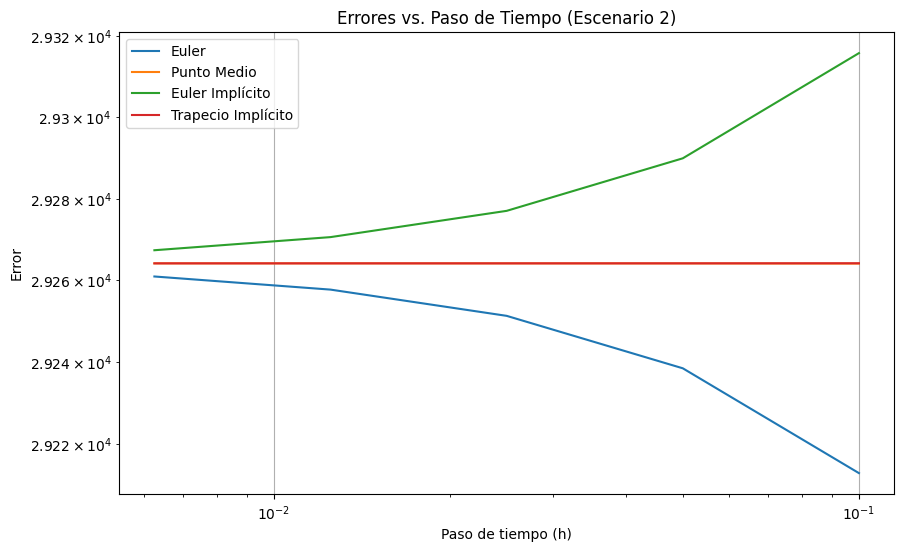

In [4]:


# Almacenar errores para cada método y paso de tiempo
errors_euler = []
errors_punto_medio = []
errors_euler_implicito = []
errors_trapecio_implicito = []

for h in h_values:
    t = np.arange(0, t2[-1] + h, h)

    # Calcular las soluciones para cada método
    sol_euler = euler(romer_model, x0_2, t)[-1]
    sol_punto_medio = punto_medio(romer_model, x0_2, t)[-1]
    sol_euler_implicito = euler_implicito(romer_model, x0_2, t)[-1]
    sol_trapecio_implicito = trapecio_implicito(romer_model, x0_2, t)[-1]

    # Calcular errores y almacenarlos
    errors_euler.append(np.linalg.norm(sol_real - sol_euler))
    errors_punto_medio.append(np.linalg.norm(sol_real - sol_punto_medio))
    errors_euler_implicito.append(np.linalg.norm(sol_real - sol_euler_implicito))
    errors_trapecio_implicito.append(np.linalg.norm(sol_real - sol_trapecio_implicito))

# Graficar resultados en escala logarítmica
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors_euler, label='Euler')
plt.loglog(h_values, errors_punto_medio, label='Punto Medio')
plt.loglog(h_values, errors_euler_implicito, label='Euler Implícito')
plt.loglog(h_values, errors_trapecio_implicito, label='Trapecio Implícito')
plt.xlabel('Paso de tiempo (h)')
plt.ylabel('Error')
plt.title('Errores vs. Paso de Tiempo (Escenario 2)')
plt.legend()
plt.grid(True)
plt.show()


Aprovechando el código para hacer animaciones suministrado, genere en formato GIF
dos ejemplos para cada escenario, puede ser el mejor y peor de los resultados en cada
escenario. Si no le parece una visualización adecuada, puede proponer otra forma de
apreciar dinámicamente el cambio e interacción entre las variables.

Saque conclusiones a partir de lo observado con respecto a error numérico, dificultad
de implementación/aplicación de cada método, tiempo de cómputo y otros aspectos
que le parezcan pertinentes